# Crime in India
This is the dataset of crime happening in india taken from govt crime website.
From this Analysis we make predictive model for crime using different Regressor.
In this project Repository ,we are going to try Linear Predictive model for crime in India.
Here we have Atributes i.e. State means state wise crime,
Crime-It is type of crime,
Case Charge sheeted,Convucted,Person Arrested ,and persons convicted .
here we make predictive model for crime.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('crime.csv')
df.head()

,STATE/UT,CRIME,CASES REGISTERED,CASES CHARGESHEETED,CASES CONVICTED,PERSONS ARRESTED,PERSONS CHARGESHEETED,PERSONS CONVICTED
0,Andhra Pradesh,Assault on women with intent to outrage her Mo...,6930,4814,285,6806,6274,387
1,Arunachal Pradesh,Assault on women with intent to outrage her Mo...,93,53,7,81,63,8
2,Assam,Assault on women with intent to outrage her Mo...,2409,1212,55,2538,1819,58
3,Bihar,Assault on women with intent to outrage her Mo...,331,268,44,509,525,81
4,Chhattisgarh,Assault on women with intent to outrage her Mo...,2261,2185,553,2551,2492,811


In [3]:
df.shape

(456, 8)

In [4]:
df.isnull().sum()

STATE/UT                 0
CRIME                    0
CASES REGISTERED         0
CASES CHARGESHEETED      0
CASES CONVICTED          0
PERSONS ARRESTED         0
PERSONS CHARGESHEETED    0
PERSONS CONVICTED        0
dtype: int64

No null data in above dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
STATE/UT                 456 non-null object
CRIME                    456 non-null object
CASES REGISTERED         456 non-null int64
CASES CHARGESHEETED      456 non-null int64
CASES CONVICTED          456 non-null int64
PERSONS ARRESTED         456 non-null int64
PERSONS CHARGESHEETED    456 non-null int64
PERSONS CONVICTED        456 non-null int64
dtypes: int64(6), object(2)
memory usage: 28.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283C517C080>,
      dtype=object)

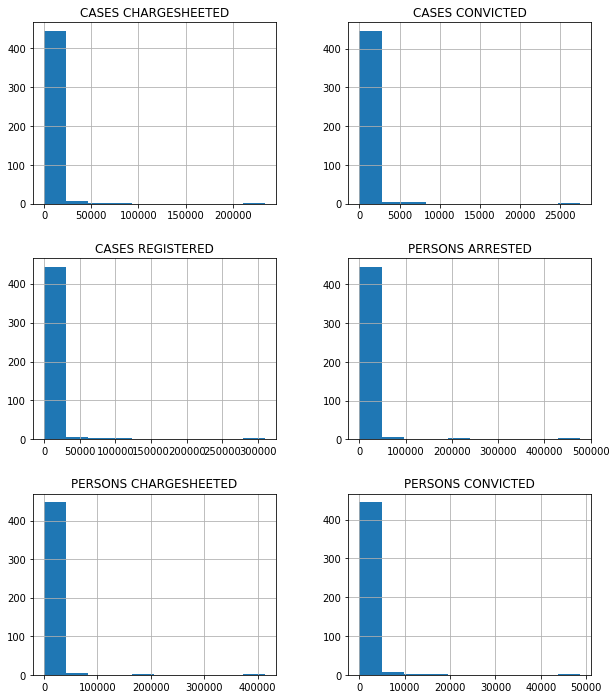

In [7]:
df.hist(figsize=(10,12))


In [9]:
df.describe()

,CASES REGISTERED,CASES CHARGESHEETED,CASES CONVICTED,PERSONS ARRESTED,PERSONS CHARGESHEETED,PERSONS CONVICTED
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,4072.973684,3075.934211,361.526316,6276.434211,5437.250000,640.144737
std,22447.692938,17152.891591,1972.004238,35708.868167,30898.628539,3549.213095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,28.500000,4.000000,58.000000,53.500000,7.000000
75%,1187.500000,786.750000,99.750000,1266.750000,1155.250000,162.250000
max,309546.000000,233771.000000,27476.000000,477009.000000,413231.000000,48651.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

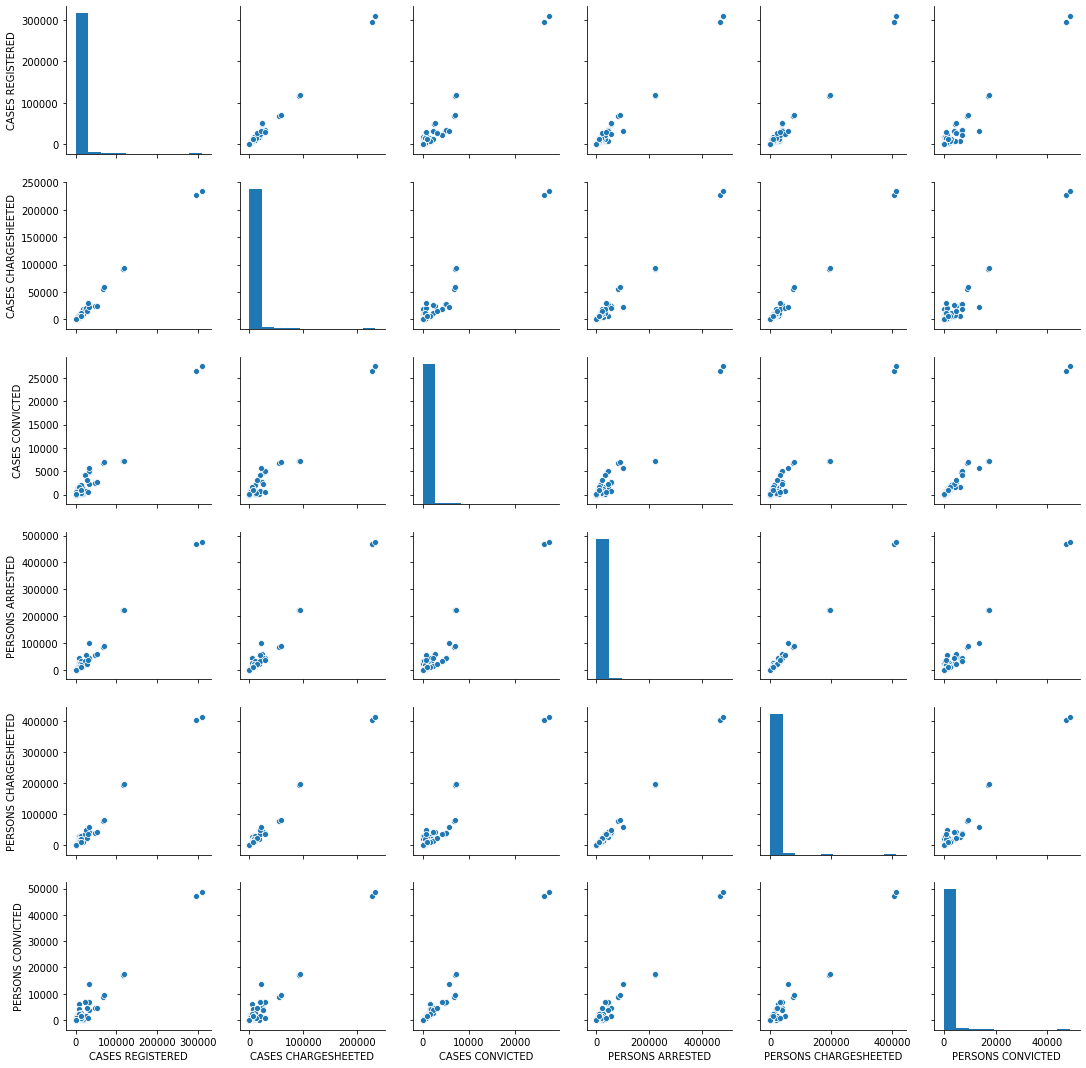

In [11]:
sns.pairplot(df)

In [12]:
df.head(2)

,STATE/UT,CRIME,CASES REGISTERED,CASES CHARGESHEETED,CASES CONVICTED,PERSONS ARRESTED,PERSONS CHARGESHEETED,PERSONS CONVICTED
0,Andhra Pradesh,Assault on women with intent to outrage her Mo...,6930,4814,285,6806,6274,387
1,Arunachal Pradesh,Assault on women with intent to outrage her Mo...,93,53,7,81,63,8


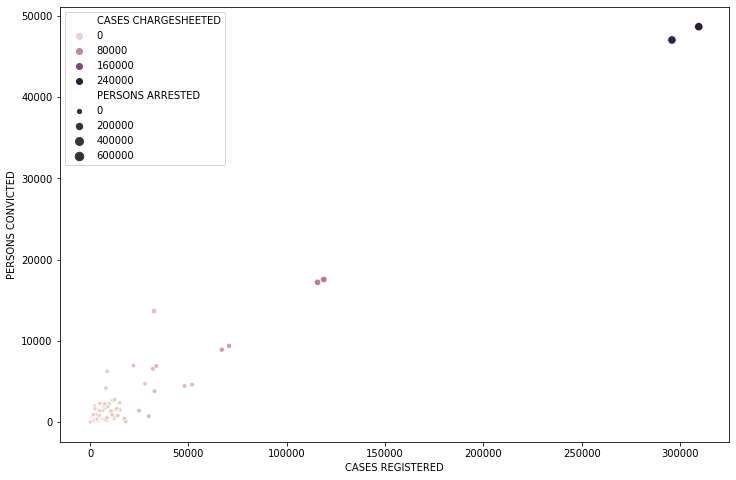

In [13]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='CASES REGISTERED',y='PERSONS CONVICTED',hue='CASES CHARGESHEETED',size='PERSONS ARRESTED',data=df)

Here we can see that scatter plot shows the linear relationship

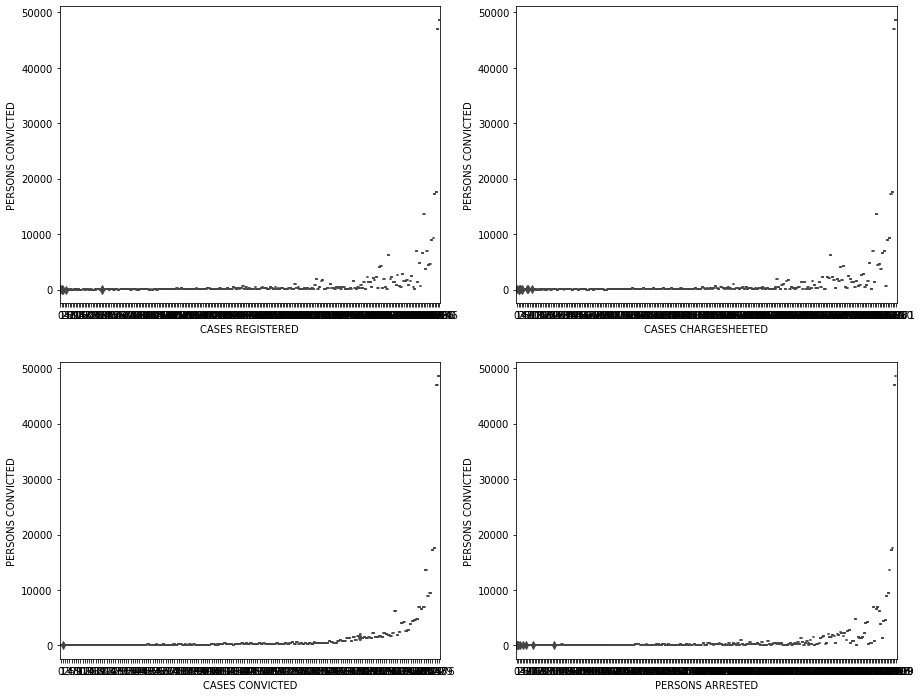

In [14]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='CASES REGISTERED',y='PERSONS CONVICTED',ax=axes[0,0],data=df)
sns.boxplot(x='CASES CHARGESHEETED',y='PERSONS CONVICTED',ax=axes[0,1],data=df)
sns.boxplot(x='CASES CONVICTED',y='PERSONS CONVICTED',ax=axes[1,0],data=df)
sns.boxplot(x='PERSONS ARRESTED',y='PERSONS CONVICTED',ax=axes[1,1],data=df)

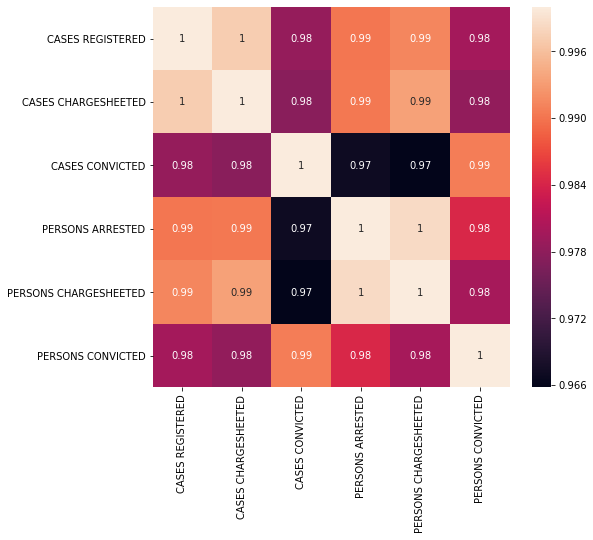

In [15]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

So from above correlation plot we can conclude that all the attributes having good correlation between person convicted
here person convicted is output variable,and rest of all are input variables.

In [17]:
x=df.iloc[:,2:-1]
x.head()

,CASES REGISTERED,CASES CHARGESHEETED,CASES CONVICTED,PERSONS ARRESTED,PERSONS CHARGESHEETED
0,6930,4814,285,6806,6274
1,93,53,7,81,63
2,2409,1212,55,2538,1819
3,331,268,44,509,525
4,2261,2185,553,2551,2492


In [18]:
y=df.iloc[:,-1]
y.head()

0    387
1      8
2     58
3     81
4    811
Name: PERSONS CONVICTED, dtype: int64

here we are defining the x and y varible for training and testing.
now we have import train the data

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [23]:
#Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [24]:
lm.fit(x_train,y_train)#to fit the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm.score(x_train,y_train)#calculate Accuracy score


0.998330406851648

So from Linear Prediction model we can say that Accuracy is 99.83% of to predict correctly



Prediction Model

In [26]:
pred=lm.predict(x_test)
print("Predicted result cancer progress:",pred)
print("actual cancer progr",y_test)

Predicted result cancer progress: [1.04873988e+01 1.08101628e+01 1.26993859e+02 1.29566543e+03
 3.82047394e+02 1.19042150e+01 1.41734152e+01 4.86926474e+03
 9.25708633e+01 2.89397459e+01 1.08101628e+01 1.08101628e+01
 5.67806111e+01 1.73176395e+01 1.68442205e+02 1.08101628e+01
 3.98978686e+02 1.08101628e+01 6.35310631e+02 1.41774996e+03
 1.76039382e+01 1.08488715e+01 1.34172378e+03 3.71091332e+02
 1.26010060e+01 7.02359301e+01 5.75098300e+02 4.73918664e+04
 2.31647063e+02 1.08101628e+01 2.51272869e+02 1.08101628e+01
 1.83822087e+03 1.72227104e+04 1.26762868e+01 1.45567949e+03
 1.08101628e+01 1.08101628e+01 1.63512173e+02 8.34985797e+01
 1.09502299e+01 2.12286422e+03 1.17927832e+01 1.08101628e+01
 1.08101628e+01 1.08101628e+01 1.08101628e+01 1.08101628e+01
 2.00196976e+01 1.08101628e+01 1.08101628e+01 4.43380741e+02
 1.08101628e+01 1.27377130e+02 1.08787796e+03 9.78315593e+02
 1.85659709e+02 5.39223998e+02 1.21211053e+01 1.29850207e+04
 1.88283875e+01 3.36280394e+02 1.58262845e+02 3.183

In [28]:
#Lets try with some other Algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
alphas=np.array([1,0.1,0.01,0.0001,0])

In [30]:
model=Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.9918083760874769
0.0


After applying the standard algo like GridSearchCV here we check for which value of alpha we met the good Accuracy score.
so here we get best accuracy score when alpha =0

In [32]:
#from KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6332305300210279

not getting good accuracy score from KNN regressor

In [33]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)

0.9951059109842849

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

So here we can see that from Decision Tree Regressor we are getting 100% Accuracy score.